## Descriptive statistics of the data following categorisation on data used in the final version of thesis for the period 2015-2024

This includes statistics such as number of articles per category, length of articles, change in number of articles overtime etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import openpyxl



In [2]:
#  most recently classified data
guardian = pd.read_csv('/Users/emmastoklundlee/Documents/Social Data Science - Masters/Thesis/data/guardian_15-24_classified.csv')

In [3]:
guardian.head()

,type,sectionName,webTitle,webUrl,date,headline,article_text,word_count,author,char_count,womens_dictionary,mens_dictionary,men_and_women,other,liveblog,month_year,classification
0,article,Football,Why always him? What made Rodgers turn to Mari...,https://www.theguardian.com/football/blog/2015...,2015-01-28,Why always him? What made Rodgers turn to Mari...,With all eyes on Diego Costa and where he stam...,720,Andy Hunter,4220,False,True,False,False,0,2015-01-01,2
1,article,Football,Football transfer rumours: Mario Suárez to Ars...,https://www.theguardian.com/football/2015/jan/...,2015-01-01,Football transfer rumours: Mario Suárez to Ars...,"Fizzle, crackle, crackle, fizzle, crackle, cra...",434,Gregg Bakowski,2408,False,True,False,False,0,2015-01-01,2
2,article,Football,Kenny Lowe: the man leading Perth Glory to the...,https://www.theguardian.com/football/2015/jan/...,2015-01-01,Kenny Lowe: the man leading Perth Glory to the...,Kenny Lowe jokes that when he leaves Perth Glo...,937,Jack Kerr,5300,False,True,False,False,0,2015-01-01,2
3,article,Football,Manchester United consider Aston Villa’s Ron V...,https://www.theguardian.com/football/2015/jan/...,2015-01-01,Manchester United consider Aston Villa’s Ron V...,Ron Vlaar is under consideration by Louis van ...,299,Jamie Jackson,1703,False,True,False,False,0,2015-01-01,2
4,article,Football,Tony Pulis appointed West Brom head coach on t...,https://www.theguardian.com/football/2015/jan/...,2015-01-01,Tony Pulis appointed West Brom head coach on t...,Tony Pulis has been appointed as the new head ...,306,Guardian sport,1777,False,True,False,False,0,2015-01-01,2


In [4]:
# add dummy column for liveblog or not
guardian['liveblog'] = np.where(guardian['type'] == 'liveblog', 1, 0)

In [5]:
guardian['other'].value_counts()

other
False    60162
True      3676
Name: count, dtype: int64

In [6]:
(3676/63838)*100

5.758325762085279

In [7]:
guardian[guardian['liveblog']==True]['other'].value_counts()

other
False    6135
True       70
Name: count, dtype: int64

In [8]:
(70/(6151+54))*100

1.1281224818694602

In [9]:
6151+54

6205

In [10]:
len(guardian)

63838

In [11]:
# check values could of womens_football column
guardian['womens_dictionary'].value_counts()

womens_dictionary
False    55610
True      8228
Name: count, dtype: int64

In [12]:
guardian['mens_dictionary'].value_counts()

mens_dictionary
True     56469
False     7369
Name: count, dtype: int64

In [13]:
guardian['only_women'] = ~guardian['men_and_women'] & guardian['womens_dictionary']

In [14]:
guardian['only_men'] = ~guardian['men_and_women'] & guardian['mens_dictionary']

In [15]:
guardian['only_women'].value_counts()

only_women
False    60145
True      3693
Name: count, dtype: int64

In [16]:
guardian['only_men'].value_counts()

only_men
True     51934
False    11904
Name: count, dtype: int64

In [17]:
guardian['men_and_women'].value_counts()

men_and_women
False    59303
True      4535
Name: count, dtype: int64

In [18]:
guardian[guardian['liveblog']==True]['men_and_women'].value_counts()

men_and_women
False    5294
True      911
Name: count, dtype: int64

In [19]:
# create new column for data as a datetime object from webPublicationDate
guardian['date'] = pd.to_datetime(guardian['date'])

In [20]:
# find the earliest and latest date in the data
guardian['date'].min(), guardian['date'].max()

(Timestamp('2015-01-01 00:00:00'), Timestamp('2024-08-31 00:00:00'))

In [21]:
# count average length of article for womens football and mens football
guardian.groupby('mens_dictionary')['word_count'].mean()

mens_dictionary
False     784.466278
True     1059.543643
Name: word_count, dtype: float64

In [22]:
guardian.groupby('only_men')['word_count'].mean()

only_men
False    1119.360803
True     1006.801537
Name: word_count, dtype: float64

In [23]:
guardian.groupby('only_women')['word_count'].mean()

only_women
False    1031.223576
True      971.881939
Name: word_count, dtype: float64

In [24]:
guardian['word_count'].mean()

1027.7906889313574

In [25]:
# total number of words in the data
guardian[guardian['womens_dictionary'] == False]['word_count'].sum()

54478803

In [26]:
guardian[guardian['only_men'] == True]['word_count'].sum()

52287231

In [27]:
# total number of words in womens football articles
guardian[guardian['womens_dictionary'] == True]['word_count'].sum()

11133299

In [28]:
guardian[guardian['only_women'] == True]['word_count'].sum()

3589160

In [29]:
# total number of words in womens football articles
guardian[guardian['womens_dictionary'] == True][guardian['liveblog']==1]['word_count'].sum()

/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_63865/1425365182.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  guardian[guardian['womens_dictionary'] == True][guardian['liveblog']==1]['word_count'].sum()


4864754

In [30]:
guardian[guardian['only_women'] == True][guardian['liveblog']==1]['word_count'].sum()

/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_63865/515338903.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  guardian[guardian['only_women'] == True][guardian['liveblog']==1]['word_count'].sum()


1190808

In [31]:
(guardian[guardian['womens_dictionary'] == True][guardian['liveblog']==1]['word_count'].sum())/(guardian[guardian['womens_dictionary'] == True]['word_count'].sum())

/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_63865/409166968.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (guardian[guardian['womens_dictionary'] == True][guardian['liveblog']==1]['word_count'].sum())/(guardian[guardian['womens_dictionary'] == True]['word_count'].sum())


0.43695529959269036

In [32]:
# total number of words in womens football articles
guardian[guardian['womens_dictionary'] == True][guardian['liveblog']==0]['word_count'].sum()

/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_63865/495795013.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  guardian[guardian['womens_dictionary'] == True][guardian['liveblog']==0]['word_count'].sum()


6268545

In [33]:
guardian.head()

,type,sectionName,webTitle,webUrl,date,headline,article_text,word_count,author,char_count,womens_dictionary,mens_dictionary,men_and_women,other,liveblog,month_year,classification,only_women,only_men
0,article,Football,Why always him? What made Rodgers turn to Mari...,https://www.theguardian.com/football/blog/2015...,2015-01-28,Why always him? What made Rodgers turn to Mari...,With all eyes on Diego Costa and where he stam...,720,Andy Hunter,4220,False,True,False,False,0,2015-01-01,2,False,True
1,article,Football,Football transfer rumours: Mario Suárez to Ars...,https://www.theguardian.com/football/2015/jan/...,2015-01-01,Football transfer rumours: Mario Suárez to Ars...,"Fizzle, crackle, crackle, fizzle, crackle, cra...",434,Gregg Bakowski,2408,False,True,False,False,0,2015-01-01,2,False,True
2,article,Football,Kenny Lowe: the man leading Perth Glory to the...,https://www.theguardian.com/football/2015/jan/...,2015-01-01,Kenny Lowe: the man leading Perth Glory to the...,Kenny Lowe jokes that when he leaves Perth Glo...,937,Jack Kerr,5300,False,True,False,False,0,2015-01-01,2,False,True
3,article,Football,Manchester United consider Aston Villa’s Ron V...,https://www.theguardian.com/football/2015/jan/...,2015-01-01,Manchester United consider Aston Villa’s Ron V...,Ron Vlaar is under consideration by Louis van ...,299,Jamie Jackson,1703,False,True,False,False,0,2015-01-01,2,False,True
4,article,Football,Tony Pulis appointed West Brom head coach on t...,https://www.theguardian.com/football/2015/jan/...,2015-01-01,Tony Pulis appointed West Brom head coach on t...,Tony Pulis has been appointed as the new head ...,306,Guardian sport,1777,False,True,False,False,0,2015-01-01,2,False,True


In [34]:
# count average length of article for liveblog and non-liveblog
guardian.groupby('liveblog')['word_count'].mean()

liveblog
0     774.249770
1    3382.717969
Name: word_count, dtype: float64

In [35]:
# count average length of article for womens football and liveblog
guardian.groupby(['womens_dictionary', 'liveblog'])['word_count'].mean()

womens_dictionary  liveblog
False              0            756.097307
                   1           3301.599304
True               0            907.564065
                   1           3682.629826
Name: word_count, dtype: float64

In [36]:
guardian.groupby(['only_women', 'liveblog'])['word_count'].mean()

only_women  liveblog
False       0            776.890248
            1           3416.558585
True        0            730.536704
            1           2904.409756
Name: word_count, dtype: float64

In [37]:
guardian.groupby(['mens_dictionary', 'liveblog'])['word_count'].mean()

mens_dictionary  liveblog
False            0            637.215126
                 1           2897.827083
True             0            792.853579
                 1           3423.372576
Name: word_count, dtype: float64

In [38]:
guardian.groupby(['only_men', 'liveblog'])['word_count'].mean()

only_men  liveblog
False     0            785.690859
          1           3641.195543
True      0            771.697135
          1           3308.031159
Name: word_count, dtype: float64

In [39]:
guardian.groupby(['womens_dictionary'])['liveblog'].sum()

womens_dictionary
False    4884
True     1321
Name: liveblog, dtype: int64

In [40]:
guardian.groupby(['only_women'])['liveblog'].sum()

only_women
False    5795
True      410
Name: liveblog, dtype: int64

In [41]:
guardian.groupby(['mens_dictionary'])['liveblog'].sum()

mens_dictionary
False     480
True     5725
Name: liveblog, dtype: int64

In [42]:
guardian.groupby(['only_men'])['liveblog'].sum()

only_men
False    1391
True     4814
Name: liveblog, dtype: int64

In [43]:
guardian.groupby(['men_and_women'])['liveblog'].sum()

men_and_women
False    5294
True      911
Name: liveblog, dtype: int64

In [44]:
# values count for author top 10
guardian['author'].value_counts().head(30)

author
Guardian sport                 3298
Jamie Jackson                  2210
Andy Hunter                    1938
Unknown                        1886
Jacob Steinberg                1867
Barry Glendenning              1697
David Hytner                   1506
Scott Murray                   1489
Louise Taylor                  1362
Paul Doyle                     1139
Ben Fisher                     1118
Nick Ames                      1065
Ed Aarons                      1063
Rob Smyth                       999
Dominic Fifield                 956
Suzanne Wrack                   948
Simon Burnton                   905
Paul Wilson                     898
Paul MacInnes                   887
Sid Lowe                        835
Jonathan Wilson                 808
Barney Ronay                    745
Will Unwin                      650
David Conn                      593
Guardian sport and agencies     509
John Brewin                     504
Nicky Bandini                   496
Daniel Taylor        

In [45]:
guardian.groupby('men_and_women')['liveblog'].value_counts()


men_and_women  liveblog
False          0           54009
               1            5294
True           0            3624
               1             911
Name: count, dtype: int64

In [46]:
guardian['liveblog'].value_counts()

liveblog
0    57633
1     6205
Name: count, dtype: int64

In [47]:
# 20% of overlap is on liveblog
911/(6205)

0.1468170829975826

In [48]:
4535/63838

0.07103919295717284

In [49]:
# display subset of articles where they are womens football and liveblog
guardian[(guardian['womens_dictionary'] == True) & (guardian['liveblog'] == 1)].tail(20)

,type,sectionName,webTitle,webUrl,date,headline,article_text,word_count,author,char_count,womens_dictionary,mens_dictionary,men_and_women,other,liveblog,month_year,classification,only_women,only_men
62956,liveblog,Football,Euro 2024: quarter-final buildup begins as Eng...,https://www.theguardian.com/football/live/2024...,2024-07-03,Euro 2024: quarter-final buildup begins as Eng...,Thank you very much for joining me (and others...,3968,"David Tindall and Tom Davies (earlier), Will U...",23297,True,True,True,False,1,2024-07-01,3,False,False
63013,liveblog,Football,Newcastle will fight to keep Howe after Southg...,https://www.theguardian.com/football/live/2024...,2024-07-16,Newcastle will fight to keep Howe after Southg...,"And with that, the news blog closes here, thou...",5749,"Gregg Bakowski, Michael Butler, Tom Davies and...",33204,True,True,True,False,1,2024-07-01,3,False,False
63040,liveblog,Football,Euro 2024: England players leave training camp...,https://www.theguardian.com/football/live/2024...,2024-07-13,Euro 2024: England players leave training camp...,That’s all from me today. Thank you for readin...,4591,Emillia Hawkins and Xaymaca Awoyungbo,25504,True,True,True,False,1,2024-07-01,3,False,False
63110,liveblog,Football,"Euro 2024: England v Switzerland buildup, plus...",https://www.theguardian.com/football/live/2024...,2024-07-06,"Euro 2024: England v Switzerland buildup, plus...",The MBM OGs are in the building so it’s time t...,4969,Rob Smyth and John Brewin,28393,True,True,True,False,1,2024-07-01,3,False,False
63158,liveblog,Football,Sweden 0-0 England: Euro 2025 qualifying – as ...,https://www.theguardian.com/football/live/2024...,2024-07-16,Sweden 0-0 England: Euro 2025 qualifying – as ...,"That’s your lot. Tom Garry’s report is live, s...",2524,Rob Smyth,14560,True,True,True,False,1,2024-07-01,3,False,False
63160,liveblog,Football,England 1-1 Switzerland (5-3 on pens): Euro 20...,https://www.theguardian.com/football/live/2024...,2024-07-06,England 1-1 Switzerland (5-3 on pens): Euro 20...,"Time to sign off here, but I’ll leave you with...",4837,"Barry Glendenning (the match), Will Unwin and ...",27432,True,True,True,False,1,2024-07-01,3,False,False
63162,liveblog,Football,Venezuela 1-1 Canada (3-4 pens): Copa América ...,https://www.theguardian.com/football/live/2024...,2024-07-06,Venezuela 1-1 Canada (3-4 pens): Copa América ...,Canada should look at this game as an opportun...,4480,Beau Dure,25625,True,True,True,False,1,2024-07-01,3,False,False
63235,liveblog,Football,Euro 2024 news: England and Spain squads retur...,https://www.theguardian.com/football/live/2024...,2024-07-15,Euro 2024 news: England and Spain squads retur...,Thank you very much for joining me – and all m...,4177,Xaymaca Awoyungbo (earlier) and Will Unwin (now),23739,True,True,True,False,1,2024-07-01,3,False,False
63260,liveblog,Football,Spain 2-1 England: Euro 2024 final – as it hap...,https://www.theguardian.com/football/live/2024...,2024-07-14,Spain 2-1 England: Euro 2024 final – as it hap...,Thank you very much for joining me (but mainly...,9402,Rob Smyth (earlier) and Will Unwin (now),53173,True,True,True,False,1,2024-07-01,3,False,False
63336,liveblog,Football,Netherlands 1-2 England: Euro 2024 semi-final ...,https://www.theguardian.com/football/live/2024...,2024-07-10,Netherlands 1-2 England: Euro 2024 semi-final ...,Thank you for joining me – but mainly Rob – I ...,8260,Rob Smyth,47064,True,True,True,False,1,2024-07-01,3,False,False


In [50]:
# create a column with month and year of the article with month first then year
guardian['month_year'] = guardian['date'].dt.strftime('%m-%Y')


## creating a new dataframe where the overlapping articles are dropped and those with no label are dropped


In [51]:
guardian.head()

,type,sectionName,webTitle,webUrl,date,headline,article_text,word_count,author,char_count,womens_dictionary,mens_dictionary,men_and_women,other,liveblog,month_year,classification,only_women,only_men
0,article,Football,Why always him? What made Rodgers turn to Mari...,https://www.theguardian.com/football/blog/2015...,2015-01-28,Why always him? What made Rodgers turn to Mari...,With all eyes on Diego Costa and where he stam...,720,Andy Hunter,4220,False,True,False,False,0,01-2015,2,False,True
1,article,Football,Football transfer rumours: Mario Suárez to Ars...,https://www.theguardian.com/football/2015/jan/...,2015-01-01,Football transfer rumours: Mario Suárez to Ars...,"Fizzle, crackle, crackle, fizzle, crackle, cra...",434,Gregg Bakowski,2408,False,True,False,False,0,01-2015,2,False,True
2,article,Football,Kenny Lowe: the man leading Perth Glory to the...,https://www.theguardian.com/football/2015/jan/...,2015-01-01,Kenny Lowe: the man leading Perth Glory to the...,Kenny Lowe jokes that when he leaves Perth Glo...,937,Jack Kerr,5300,False,True,False,False,0,01-2015,2,False,True
3,article,Football,Manchester United consider Aston Villa’s Ron V...,https://www.theguardian.com/football/2015/jan/...,2015-01-01,Manchester United consider Aston Villa’s Ron V...,Ron Vlaar is under consideration by Louis van ...,299,Jamie Jackson,1703,False,True,False,False,0,01-2015,2,False,True
4,article,Football,Tony Pulis appointed West Brom head coach on t...,https://www.theguardian.com/football/2015/jan/...,2015-01-01,Tony Pulis appointed West Brom head coach on t...,Tony Pulis has been appointed as the new head ...,306,Guardian sport,1777,False,True,False,False,0,01-2015,2,False,True


In [52]:
print(guardian.dtypes)  # Check the data types of the columns

type                         object
sectionName                  object
webTitle                     object
webUrl                       object
date                 datetime64[ns]
headline                     object
article_text                 object
word_count                    int64
author                       object
char_count                    int64
womens_dictionary              bool
mens_dictionary                bool
men_and_women                  bool
other                          bool
liveblog                      int64
month_year                   object
classification                int64
only_women                     bool
only_men                       bool
dtype: object


In [53]:
guardian_new = guardian[guardian['only_men'] | guardian['only_women']]


In [54]:
guardian_new.head()

,type,sectionName,webTitle,webUrl,date,headline,article_text,word_count,author,char_count,womens_dictionary,mens_dictionary,men_and_women,other,liveblog,month_year,classification,only_women,only_men
0,article,Football,Why always him? What made Rodgers turn to Mari...,https://www.theguardian.com/football/blog/2015...,2015-01-28,Why always him? What made Rodgers turn to Mari...,With all eyes on Diego Costa and where he stam...,720,Andy Hunter,4220,False,True,False,False,0,01-2015,2,False,True
1,article,Football,Football transfer rumours: Mario Suárez to Ars...,https://www.theguardian.com/football/2015/jan/...,2015-01-01,Football transfer rumours: Mario Suárez to Ars...,"Fizzle, crackle, crackle, fizzle, crackle, cra...",434,Gregg Bakowski,2408,False,True,False,False,0,01-2015,2,False,True
2,article,Football,Kenny Lowe: the man leading Perth Glory to the...,https://www.theguardian.com/football/2015/jan/...,2015-01-01,Kenny Lowe: the man leading Perth Glory to the...,Kenny Lowe jokes that when he leaves Perth Glo...,937,Jack Kerr,5300,False,True,False,False,0,01-2015,2,False,True
3,article,Football,Manchester United consider Aston Villa’s Ron V...,https://www.theguardian.com/football/2015/jan/...,2015-01-01,Manchester United consider Aston Villa’s Ron V...,Ron Vlaar is under consideration by Louis van ...,299,Jamie Jackson,1703,False,True,False,False,0,01-2015,2,False,True
4,article,Football,Tony Pulis appointed West Brom head coach on t...,https://www.theguardian.com/football/2015/jan/...,2015-01-01,Tony Pulis appointed West Brom head coach on t...,Tony Pulis has been appointed as the new head ...,306,Guardian sport,1777,False,True,False,False,0,01-2015,2,False,True


In [55]:
len(guardian_new)

55627

In [ ]:
# save this data to a csv file
guardian_new.to_csv('guardian_classified_clean.csv', index=False)

In [57]:
# count number of women and men articles in guardian df
len(guardian_new[guardian_new['only_women'] == True])

3693

In [58]:
len(guardian_new)-3693

51934

<Figure size 1000x700 with 0 Axes>

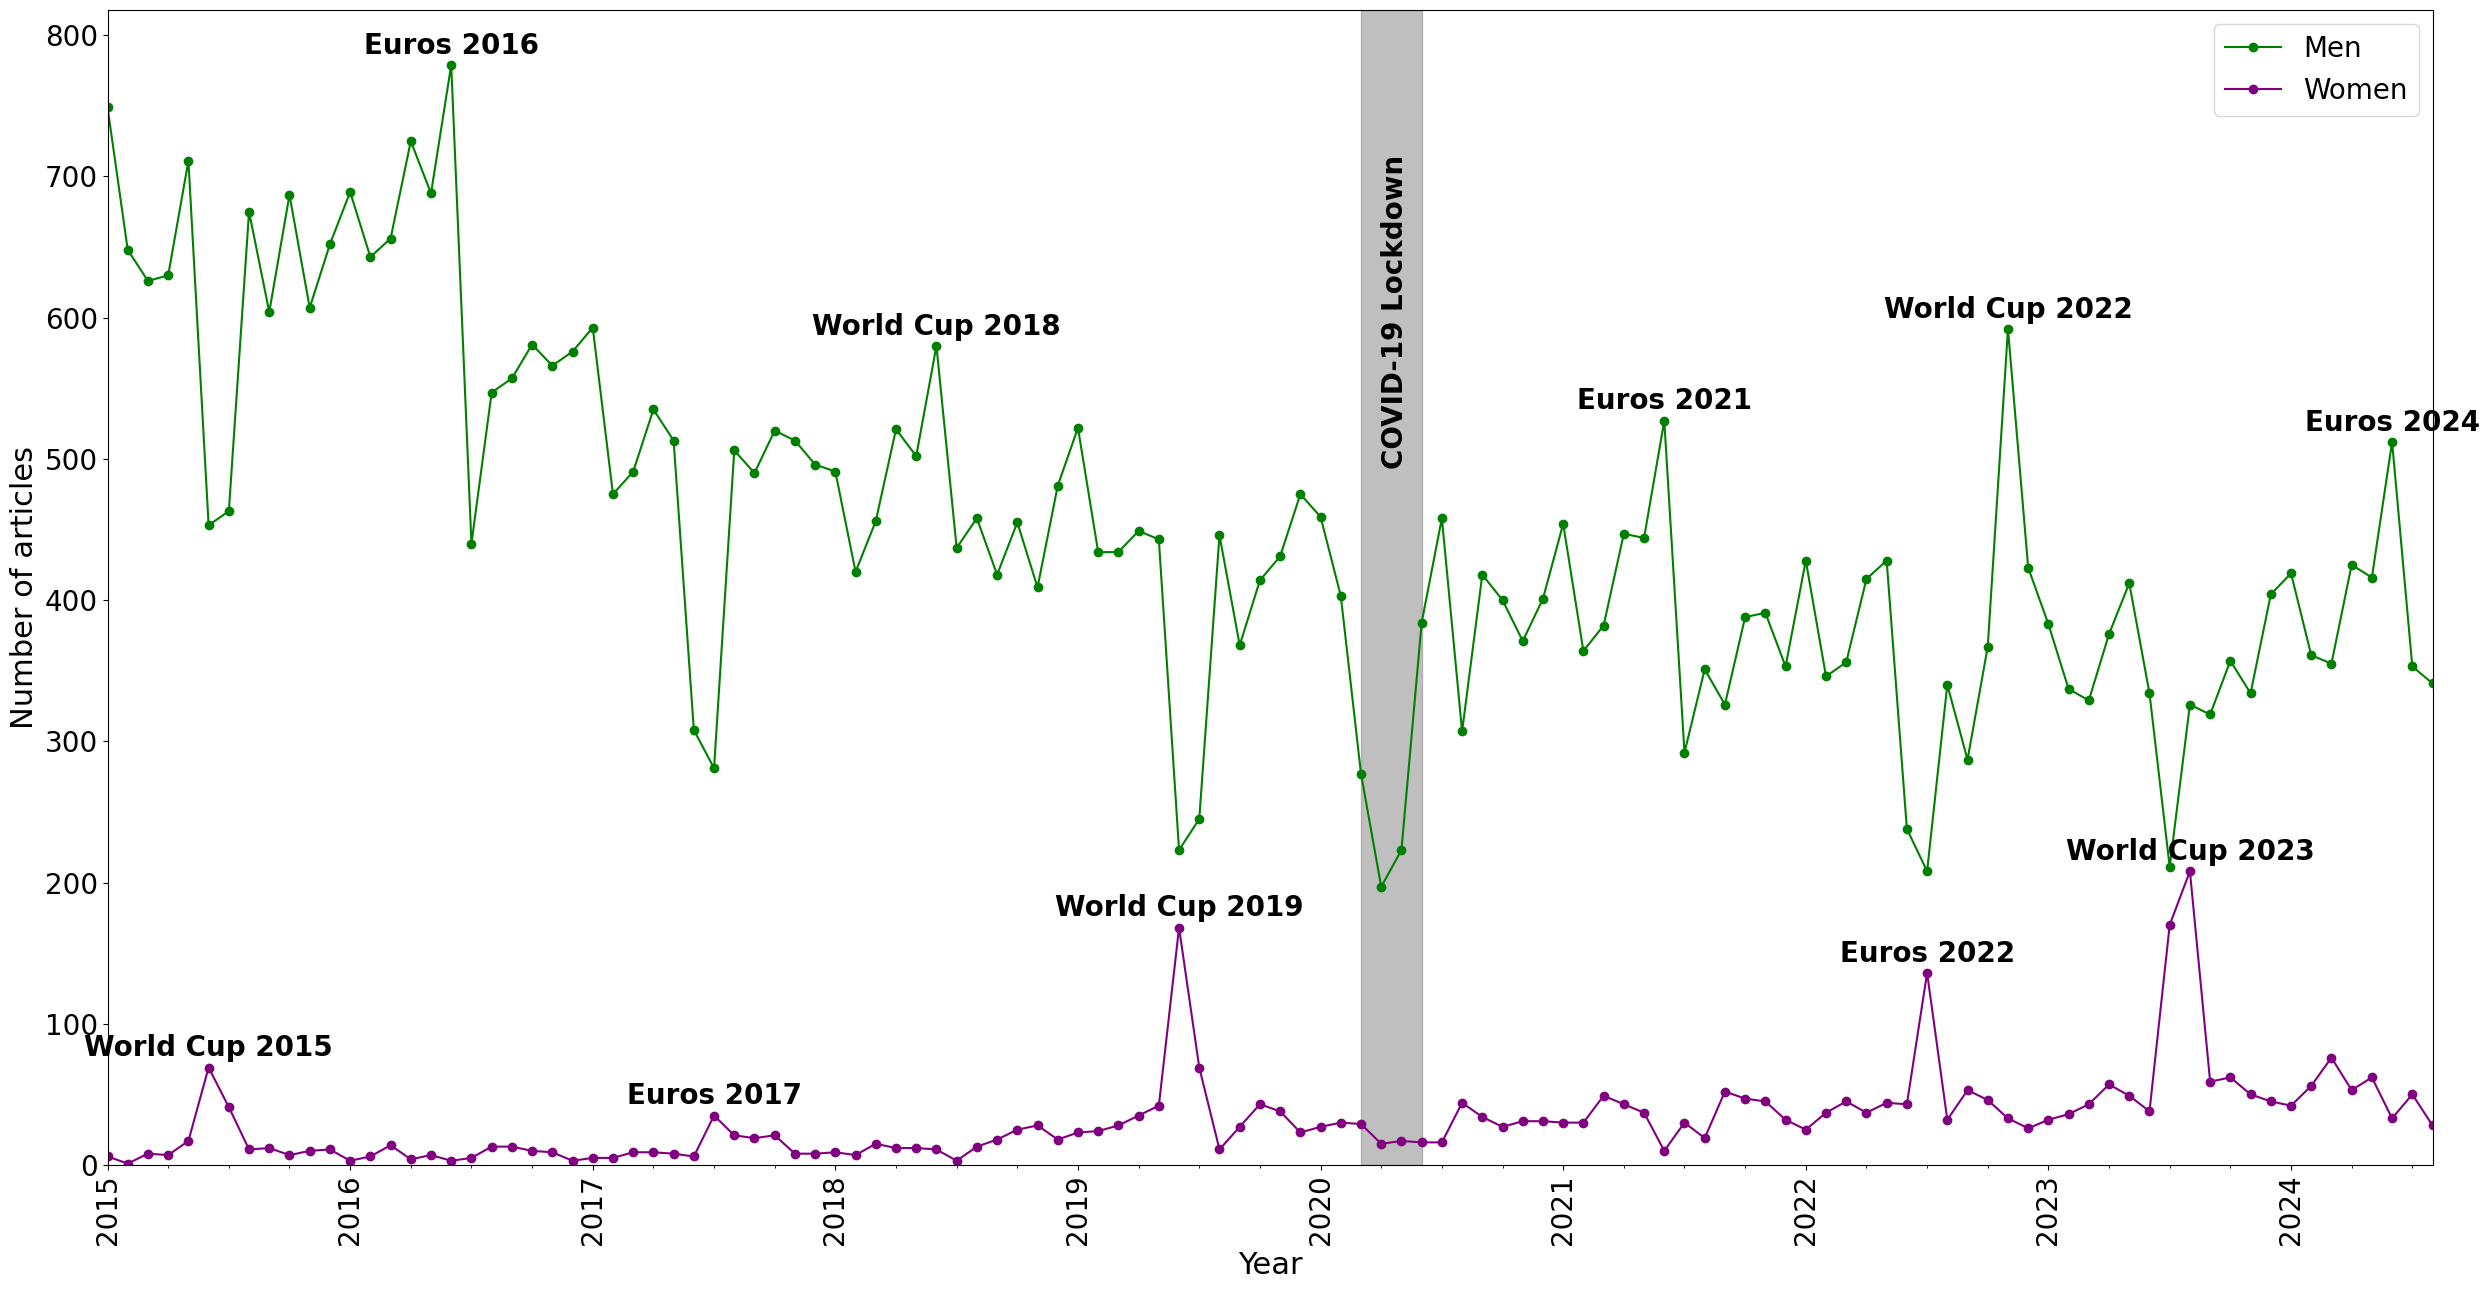

In [98]:
plt.figure(figsize=(10, 7))

# Sort the data by month_year after converting to datetime (already done)
guardian_new['month_year'] = pd.to_datetime(guardian_new['month_year'], format='%m-%Y')
guardian_new = guardian_new.sort_values('month_year')

# count the number of articles per month and for each category (womens_football)
grouped_data = guardian_new.groupby(['month_year', 'only_women']).size().unstack(fill_value=0)

# create a line plot instead of a bar plot
grouped_data.plot(kind='line', marker='o', figsize=(30, 15), color=['#008000', '#800080'])

# Shade the COVID-19 lockdown period from March 2020 to June 2020
plt.axvspan(pd.to_datetime('03-2020', format='%m-%Y'), 
            pd.to_datetime('06-2020', format='%m-%Y'), 
            color='grey', alpha=0.5)

# Set the y-axis to start at 0
plt.ylim(bottom=0)

# Add labels for major events
events = {
    'World Cup 2015': '06-2015',  # Women's
    'Euros 2016': '06-2016',      # Men's
    'Euros 2017': '07-2017',      # Women's
    'World Cup 2019': '06-2019',  # Women's
    'World Cup 2018': '06-2018',  # Men's
    'Euros 2021': '06-2021',      # Men's (postponed)
    'Euros 2022': '07-2022',      # Women's (postponed)
    'World Cup 2022': '11-2022',  # Men's
    'World Cup 2023': '08-2023',  # Women's
    'Euros 2024': '06-2024'       # Men's
}

for event, date in events.items():
    date_dt = pd.to_datetime(date, format='%m-%Y')

    # Determine y-value based on even (men's) and odd (women's) years
    year = date_dt.year
    if year % 2 == 0:  # Even year (Men's events)
        y_value = grouped_data.loc[date_dt].max() + 10  # Use max for men's line
    else:  # Odd year (Women's events)
        y_value = grouped_data.loc[date_dt].min() + 10  # Use min for women's line

    # Special handling for Euros 2021 and 2022
    if event == 'Euros 2021':
        y_value = grouped_data.loc[date_dt].max() + 10  # Men's event
    elif event == 'Euros 2022':
        y_value = grouped_data.loc[date_dt].min() + 10 # Women's event

    # Adjust the position of labels
    offset = -2
    plt.text(date_dt, y_value + offset, event, fontsize=20, color='black', weight='bold', ha='center')

# Add the COVID-19 label only once at a specific position in the shaded area
covid_label_date = pd.to_datetime('04-2020', format='%m-%Y')  # Middle of the lockdown
covid_y_value = grouped_data.loc[covid_label_date].max() + 300  # Adjusted y-position for visibility
plt.text(covid_label_date, covid_y_value, 'COVID-19 Lockdown', fontsize=20, color='black', weight='bold', ha='left', rotation=90)

# Customize the x-axis labels
plt.xticks(rotation=90, fontsize=20)  # Increase x-axis label size
plt.yticks(fontsize=20)  # Increase y-axis label size

# Add titles and labels
# plt.title('Number of articles by month', fontsize=24)
plt.xlabel('Year', fontsize=22)
plt.ylabel('Number of articles', fontsize=22)

# Show the legend with custom labels
plt.legend(['Men', 'Women'], fontsize=20, title_fontsize=20)

plt.show()


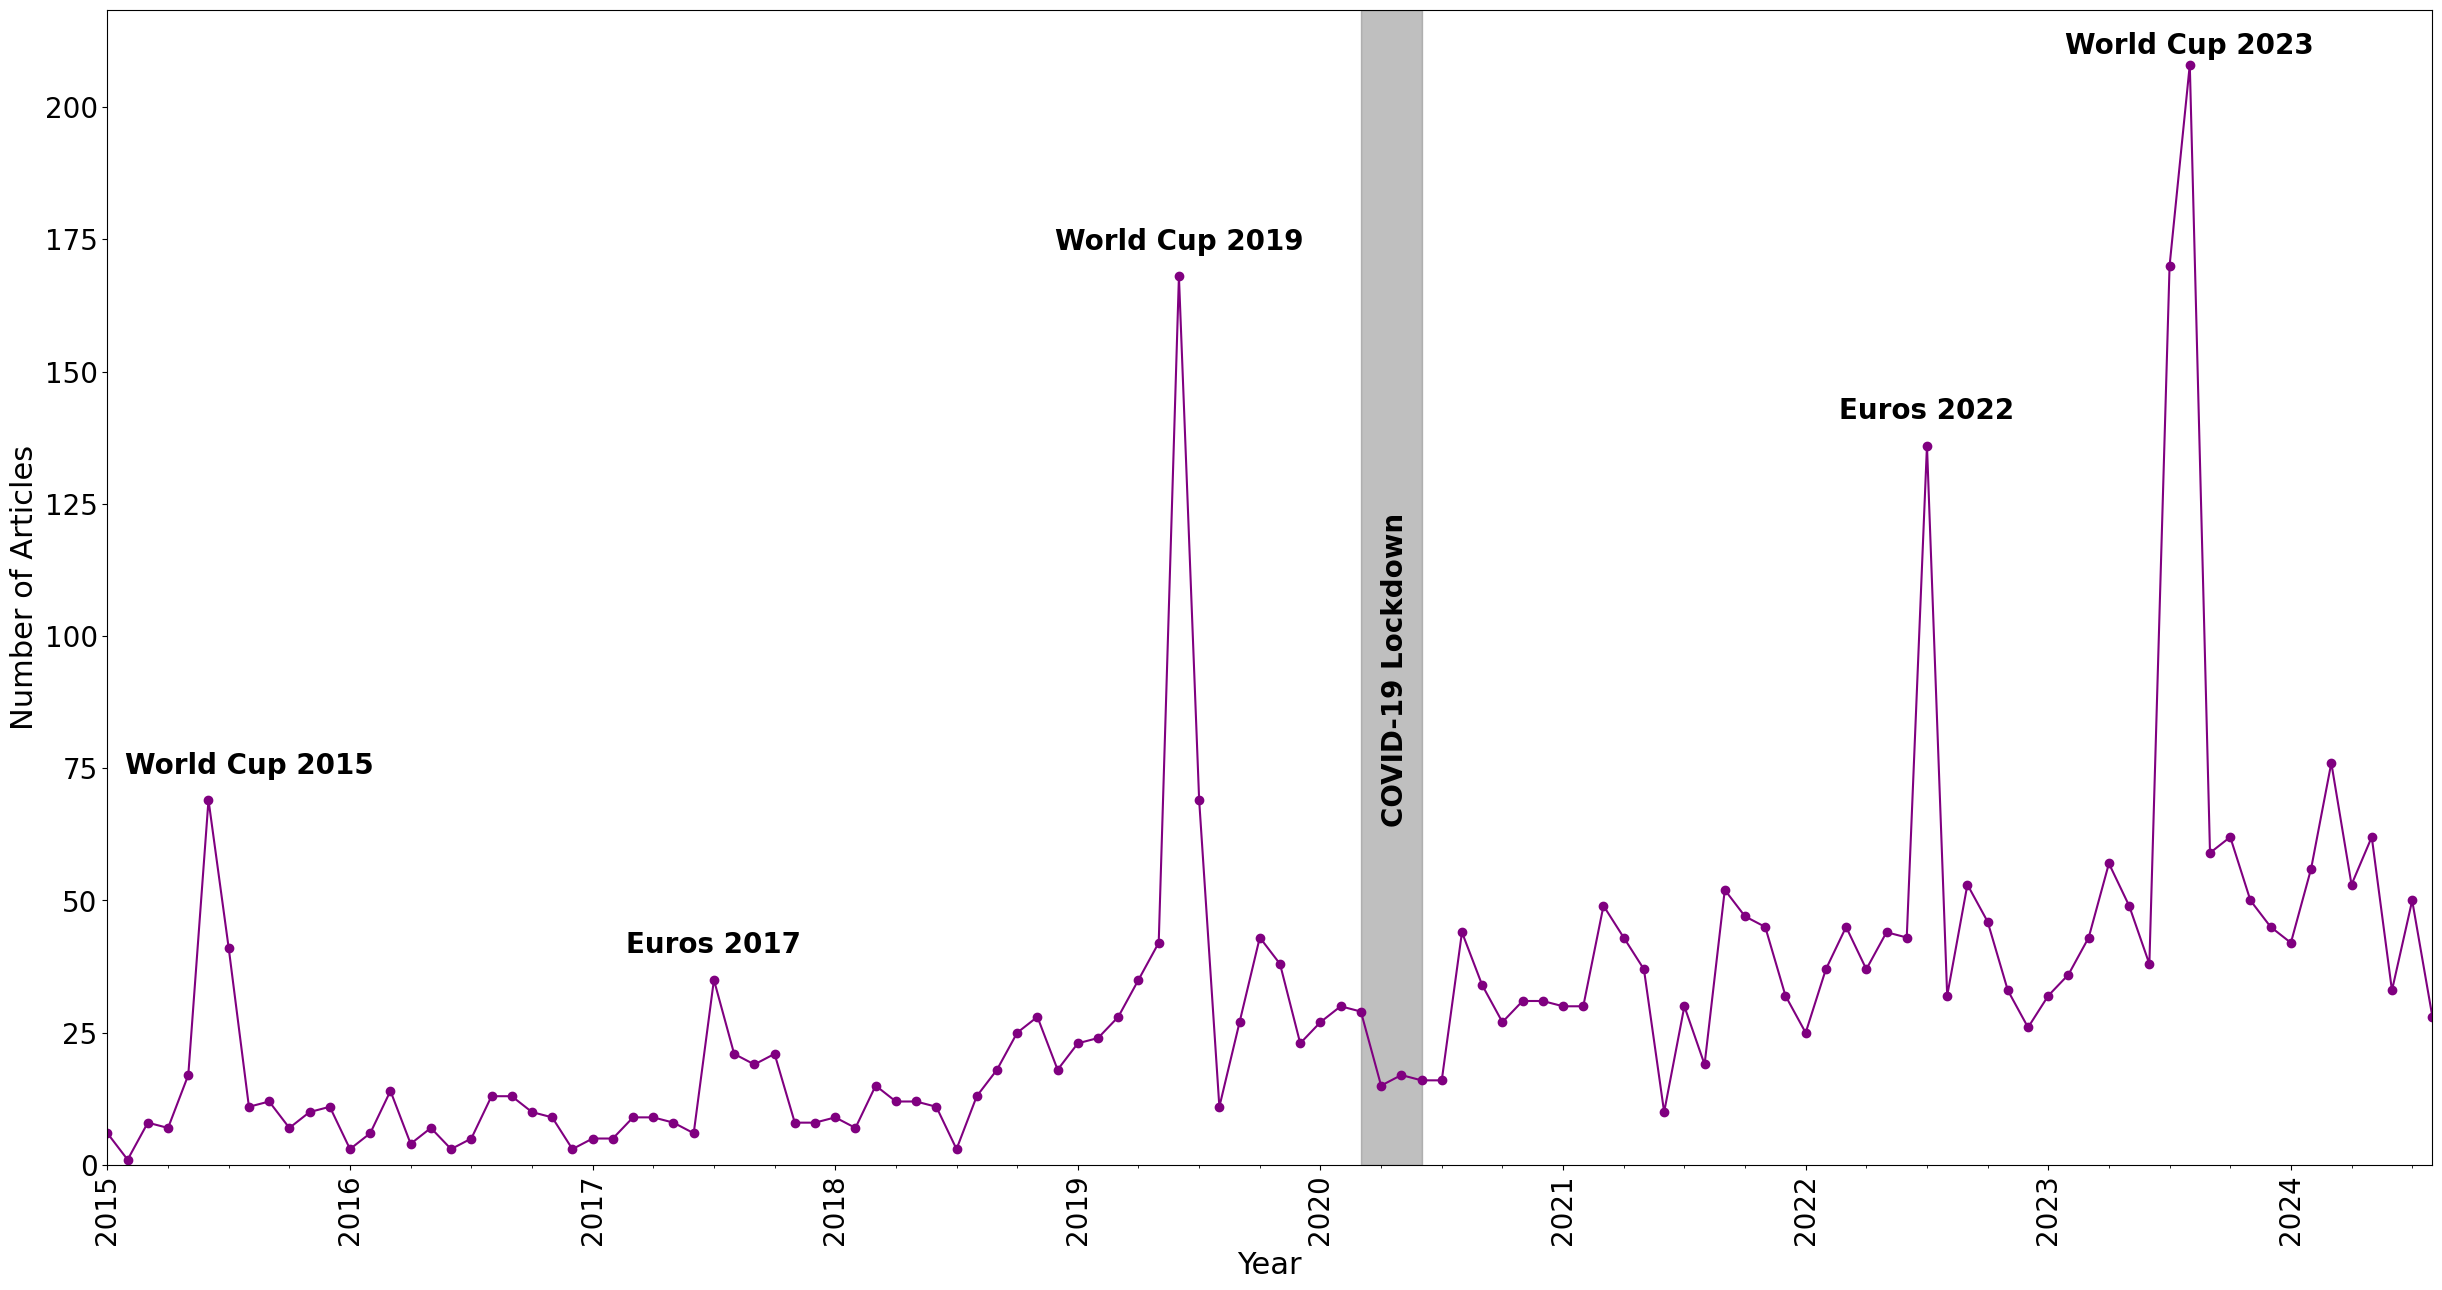

In [97]:
plt.figure(figsize=(10, 7))

# Ensure the data is sorted by month_year
guardian_new['month_year'] = pd.to_datetime(guardian_new['month_year'], format='%m-%Y')
guardian_new = guardian_new.sort_values('month_year')

# Filter the data to only include 'womens_football' related articles
guardian_womens_football = guardian_new[guardian_new['only_women'] == 1]

# Count the number of articles per month for 'womens_football'
grouped_data = guardian_womens_football.groupby('month_year').size()

# create a line plot instead of a bar plot
grouped_data.plot(kind='line', marker='o', figsize=(30, 15), color=['#800080'])


# Shade the COVID-19 lockdown period from March 2020 to June 2020
plt.axvspan(pd.to_datetime('03-2020', format='%m-%Y'), 
            pd.to_datetime('06-2020', format='%m-%Y'), 
            color='grey', alpha=0.5)

# Add the COVID-19 label only once at a specific position in the shaded area
covid_label_date = pd.to_datetime('04-2020', format='%m-%Y')  # Middle of the lockdown
covid_y_value = grouped_data.loc[covid_label_date].max() + 50  # Adjusted y-position for visibility
plt.text(covid_label_date, covid_y_value, 'COVID-19 Lockdown', fontsize=20, color='black', weight='bold', ha='left', rotation=90)


# Set the y-axis to start at 0
plt.ylim(bottom=0)



# Add label for World Cup 2015
world_cup_2015 = pd.to_datetime('06-2015', format='%m-%Y')
y_value_world_cup_2015 = grouped_data.loc[world_cup_2015] if world_cup_2015 in grouped_data.index else 0
plt.text(world_cup_2015 + pd.Timedelta(days=80) , y_value_world_cup_2015 +5, 'World Cup 2015', fontsize=20, color='black', weight='bold', ha='center')

# Add label for Euros 2017
june_2017 = pd.to_datetime('07-2017', format='%m-%Y')
y_value_june_2017 = grouped_data.loc[june_2017] if june_2017 in grouped_data.index else 0
plt.text(june_2017, y_value_june_2017 + 5, 'Euros 2017', fontsize=20, color='black', weight='bold', ha='center')

# Add label for World Cup 2019
world_cup_2019 = pd.to_datetime('06-2019', format='%m-%Y')
y_value_world_cup_2019 = grouped_data.loc[world_cup_2019] if world_cup_2019 in grouped_data.index else 0
plt.text(world_cup_2019, y_value_world_cup_2019 + 5, 'World Cup 2019', fontsize=20, color='black', weight='bold', ha='center')

# Add label for Euros 2022
euros_2022 = pd.to_datetime('07-2022', format='%m-%Y')
y_value_euros_2022 = grouped_data.loc[euros_2022] if euros_2022 in grouped_data.index else 0
plt.text(euros_2022, y_value_euros_2022 + 5, 'Euros 2022', fontsize=20, color='black', weight='bold', ha='center')

# Add label for World Cup 2023
world_cup_2023 = pd.to_datetime('08-2023', format='%m-%Y')
y_value_world_cup_2023 = grouped_data.loc[world_cup_2023] if world_cup_2023 in grouped_data.index else 0
plt.text(world_cup_2023, y_value_world_cup_2023 +2 , 'World Cup 2023', fontsize=20, color='black', weight='bold', ha='center')

# Customize the x-axis labels
plt.xticks(rotation=90, fontsize=20)  # Increase x-axis label size
plt.yticks(fontsize=20)  # Increase y-axis label size


# Add titles and labels
# plt.title('Number of Women\'s Football Articles by Month', fontsize=24)
plt.xlabel('Year', fontsize=22)
plt.ylabel('Number of Articles', fontsize=22)



# Display the plot
plt.show()
